<a href="https://colab.research.google.com/github/Abhinavl3v3l/EVA3/blob/master/Assignment4morethan15kparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist                                                # Importing Necessary Libraries and dataset(in keras)

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()                        # mnist data divided into Training and Test Data
                                                                                # Where X_train are 60K 28x28 gray scale training images of numbers from [0-9] 
                                                                                # y_train are label of numbers from [0-9]

(60000, 28, 28)


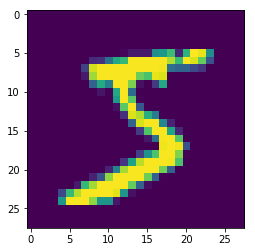

In [37]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])                                                           # Displaying what one of the images look like.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)                           # (60000, 28, 28) ->  (60000, 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')                                             # Convert to float type
X_test = X_test.astype('float32') 
X_train /= 255
X_test /= 255                                                                   # Floating Value ranges from [0,1]

In [40]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)                                  
Y_test = np_utils.to_categorical(y_test, 10)

In [42]:
Y_train[:10]                                                                    ## y_train to Y_train  - example,5 value is converted to an array where 5th element of array is 1(lit) and rest all is 0 
                                                                                
                                                                                # OR 
                                                                                
                                                                                # 1 Hot Encoded  


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### This assignment's code is divided into 4 parts. 

1.    Architecture( remains constant).
2.    Kernel Optimization to fit under 15K constraint.
3.    Go Crazy (Batch Normalization, Drop Out, Learning Rate, Batch Size).
4.    Accuracy above 99.4% (if possible less than 15 epochs)

#### Guidelines
1.    Make sure you are tracking your code's performance, and writing down your observations as you achieve better or worse results
2.    Your second code can only have max 2 improvements over first one, third can have only max 2 over second and so on. 
3.    All of your iterations are in different CODE BLOCKS and named properly like First CODE, Second CODE, etc
4.    All of your iterations have a Header note, describing what all you are planning to do in this code
5.    All of your code is very well documented
6.    There is a readme file (or embedded documentation) describing your codes and steps you've taken




# CODE 1 - Architecture

In [0]:
# # Building the layers for maximum accuracy
# from keras.layers import Activation
# model = Sequential()


# model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1)))  # Input Image size 28x28x1, 3x3 convolution with 32 channels,     GRF = 3, Parameters = 3x3x32x1  + 32        = 320           Output Image = 26x26x32
# model.add(Convolution2D(20, (3, 3), activation='relu'))  #24
# model.add(Convolution2D(24, (3, 3), activation='relu'))  #22
# model.add(Convolution2D(8, 1, activation='relu'))                              

# model.add(MaxPooling2D(pool_size=(2, 2))) #11

# model.add(Convolution2D(16, (3, 3), activation='relu'))  #9
# model.add(Convolution2D(20, (3, 3), activation='relu'))  #7
# model.add(Convolution2D(24, (3, 3), activation='relu'))  #5

# model.add(Convolution2D(25, 1, activation='relu')) 
# model.add(Convolution2D(10, 5))

# model.add(Flatten())
# model.add(Activation('softmax'))

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(8, (3, 3), activation='relu', input_shape=(28,28,1)))#26  
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, (3, 3), activation='relu'))  #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, (3, 3), activation='relu'))  #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #11

model.add(Convolution2D(16, (3, 3), activation='relu'))  #9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(32, (3, 3), activation='relu'))  #7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, (3, 3), activation='relu'))  #5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)       

In [0]:
model.compile(loss='categorical_crossentropy',                              
             optimizer='adam',
             metrics=['accuracy'])                                              # Compiler or function which calculate and adjust the loss using a loss function and measure in accuracy. A function which will optimize all the features generated. 
                                                                                # Optimizer.


from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [48]:
model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1,validation_data=(X_test, Y_test))  # Learn Learn Learn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 414us/step - loss: 0.2640 - acc: 0.9169 - val_loss: 0.0545 - val_acc: 0.9819
Epoch 2/20
60000/60000 [==============================] - 22s 373us/step - loss: 0.0747 - acc: 0.9768 - val_loss: 0.0418 - val_acc: 0.9853
Epoch 3/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.0587 - acc: 0.9817 - val_loss: 0.0356 - val_acc: 0.9889
Epoch 4/20
60000/60000 [==============================] - 22s 372us/step - loss: 0.0481 - acc: 0.9853 - val_loss: 0.0253 - val_acc: 0.9922
Epoch 5/20
60000/60000 [==============================] - 22s 374us/step - loss: 0.0441 - acc: 0.9867 - val_loss: 0.0305 - val_acc: 0.9911
Epoch 6/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.0394 - acc: 0.9875 - val_loss: 0.0280 - val_acc: 0.9916
Epoch 7/20
60000/60000 [==============================] - 22s 369us/step - loss: 0.0374 - acc: 0.9881 - val_loss: 0.

In [0]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))  # Learn Learn Lear

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1024/60000 [..............................] - ETA: 8s - loss: 0.0209 - acc: 0.9922

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 8s 129us/step - loss: 0.0145 - acc: 0.9954 - val_loss: 0.0176 - val_acc: 0.9944
Epoch 2/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0122 - acc: 0.9962 - val_loss: 0.0174 - val_acc: 0.9947
Epoch 3/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0107 - acc: 0.9965 - val_loss: 0.0169 - val_acc: 0.9950
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0113 - acc: 0.9965 - val_loss: 0.0169 - val_acc: 0.9951
Epoch 5/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0110 - acc: 0.9964 - val_loss: 0.0166 - val_acc: 0.9953
Epoch 6/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0109 - acc: 0.9963 - val_loss: 0.0162 - val_acc: 0.9951
Epoch 7/10
15360/60000 [======>.......................] - ETA: 5s - loss: 0.0102 - acc: 0.9964

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)                               # Evaluate the Model over test data

In [0]:
print(score)                                                                    # Accuracy over test data.

In [0]:
y_pred = model.predict(X_test)                                                  # predicting the values with validation accuracy

In [0]:
print(y_pred[:9])                                                               
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()